### Первый шаг
Считка файла и первый взгляд на него

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_excel('ficbook.xlsx')
print(df.shape)
df

(1794, 11)


название  \
0                         Высокая планка   
1                   Украденные мгновения   
2                    Colours of the wind   
3                           Разлюби меня   
4                            Храмы хаоса   
...                                  ...   
1789          ТЫ-МОЙ ОКЕАН,Я ДЫШУ ТОБОЙ.   
1790  Как Мэри Сью и ОЖП Саб-Зиро делили   
1791         Грушевое вино и цветы сливы   
1792                             ты мой.   
1793                Тиамат: ангел смерти   

                                                 ссылка тип отношений  \
0     https://ficbook.net/readfic/13075049?source=pr...           Гет   
1     https://ficbook.net/readfic/11945049?source=pr...          Слэш   
2     https://ficbook.net/readfic/018eb4f2-4990-7ca7...          Слэш   
3                   https://ficbook.net/readfic/2113602           Гет   
4                   https://ficbook.net/readfic/7579507          Джен   
...                                                 ...           ...   
1789                https://ficbook.net/readfic/5130658           Гет   
1790                https://ficbook.net/readfic/1032182          Джен   
1791  https://ficbook.net/readfic/018c355c-4891-7304...          Слэш   
1792                 https://ficbook.net/readfic/381778          Слэш   
1793  https://ficbook.net/readfic/018d7e3d-fb22-7c0f...           Гет   

     возрастной рейтинг статус завершенности  количество лайков  \
0                 NC-17            Заморожен                6.0   
1                     R             Завершён               10.0   
2                     R             Завершён               16.0   
3                 PG-13            Заморожен               10.0   
4                 PG-13           В процессе                0.0   
...                 ...                  ...                ...   
1789                  G             Завершён                5.0   
1790                  G             Завершён               90.0   
1791              PG-13             Завершён               80.0   
1792                  G             Завершён               42.0   
1793              NC-17           В процессе                3.0   

                                                 размер  количество меток  \
0                                   11 страниц, 3 части              12.0   
1                                   3 страницы, 1 часть               8.0   
2                                   4 страницы, 1 часть               2.0   
3                                 26 страниц, 12 частей               3.0   
4     планируется Макси, написано                   ...               4.0   
...                                                 ...               ...   
1789                                1 страница, 1 часть               1.0   
1790                                2 страницы, 1 часть               6.0   
1791                                 6 страниц, 1 часть               9.0   
1792                                2 страницы, 1 часть               3.0   
1793  планируется Миди, написано                    ...              10.0   

                                               описание  количество отзывов  \
0     Что может быть хуже подростков-каратистов, кот...                 0.0   
1     Тоска, тяга, голод друг по другу, все сильнее ...                 0.0   
2     Разделённые до сей поры временем, они навсегда...                 4.0   
3     Нильс и Чарли лучшие друзья с детства, по край...                 4.0   
4                                           Читать фик.                 1.0   
...                                                 ...                 ...   
1789  Вы знаете что такое боль? Вы когда нибудь ее и...                 0.0   
1790  Дорогие читатели! Предлагаю Вам немного отвлеч...                53.0   
1791  Спокойный тихий вечер, лепестки сливы, кружащи...                 1.0   
1792                              фанф и так маленький.                 6.0   
1793  Эверилд всегда думала

### Второй шаг
Посмотрим на информацию о таблице, а так же на количество дубликатов и пропусков

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   название                       1794 non-null   object 
 1   ссылка                         1794 non-null   object 
 2   тип отношений                  1785 non-null   object 
 3   возрастной рейтинг             1785 non-null   object 
 4   статус завершенности           1785 non-null   object 
 5   количество лайков              1785 non-null   float64
 6   размер                         1794 non-null   object 
 7   количество меток               1758 non-null   float64
 8   описание                       1793 non-null   object 
 9   количество отзывов             1783 non-null   float64
 10  количество страниц по фандому  1794 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 154.3+ KB


In [9]:
print("Количество дубликатов равно: ", df.duplicated().sum())
print("Количество пропусков: ")
print(df.isnull().sum())

Количество дубликатов равно:  1
Количество пропусков: 
название                          0
ссылка                            0
тип отношений                     9
возрастной рейтинг                9
статус завершенности              9
количество лайков                 9
размер                            0
количество меток                 36
описание                          1
количество отзывов               11
количество страниц по фандому     0
dtype: int64


### Третий шаг
Удалим дубликаты и избавимся от строк с пропусками, так как мы не будем с ними работать

In [10]:
df.drop_duplicates()

название  \
0                         Высокая планка   
1                   Украденные мгновения   
2                    Colours of the wind   
3                           Разлюби меня   
4                            Храмы хаоса   
...                                  ...   
1789          ТЫ-МОЙ ОКЕАН,Я ДЫШУ ТОБОЙ.   
1790  Как Мэри Сью и ОЖП Саб-Зиро делили   
1791         Грушевое вино и цветы сливы   
1792                             ты мой.   
1793                Тиамат: ангел смерти   

                                                 ссылка тип отношений  \
0     https://ficbook.net/readfic/13075049?source=pr...           Гет   
1     https://ficbook.net/readfic/11945049?source=pr...          Слэш   
2     https://ficbook.net/readfic/018eb4f2-4990-7ca7...          Слэш   
3                   https://ficbook.net/readfic/2113602           Гет   
4                   https://ficbook.net/readfic/7579507          Джен   
...                                                 ...           ...   
1789                https://ficbook.net/readfic/5130658           Гет   
1790                https://ficbook.net/readfic/1032182          Джен   
1791  https://ficbook.net/readfic/018c355c-4891-7304...          Слэш   
1792                 https://ficbook.net/readfic/381778          Слэш   
1793  https://ficbook.net/readfic/018d7e3d-fb22-7c0f...           Гет   

     возрастной рейтинг статус завершенности  количество лайков  \
0                 NC-17            Заморожен                6.0   
1                     R             Завершён               10.0   
2                     R             Завершён               16.0   
3                 PG-13            Заморожен               10.0   
4                 PG-13           В процессе                0.0   
...                 ...                  ...                ...   
1789                  G             Завершён                5.0   
1790                  G             Завершён               90.0   
1791              PG-13             Завершён               80.0   
1792                  G             Завершён               42.0   
1793              NC-17           В процессе                3.0   

                                                 размер  количество меток  \
0                                   11 страниц, 3 части              12.0   
1                                   3 страницы, 1 часть               8.0   
2                                   4 страницы, 1 часть               2.0   
3                                 26 страниц, 12 частей               3.0   
4     планируется Макси, написано                   ...               4.0   
...                                                 ...               ...   
1789                                1 страница, 1 часть               1.0   
1790                                2 страницы, 1 часть               6.0   
1791                                 6 страниц, 1 часть               9.0   
1792                                2 страницы, 1 часть               3.0   
1793  планируется Миди, написано                    ...              10.0   

                                               описание  количество отзывов  \
0     Что может быть хуже подростков-каратистов, кот...                 0.0   
1     Тоска, тяга, голод друг по другу, все сильнее ...                 0.0   
2     Разделённые до сей поры временем, они навсегда...                 4.0   
3     Нильс и Чарли лучшие друзья с детства, по край...                 4.0   
4                                           Читать фик.                 1.0   
...                                                 ...                 ...   
1789  Вы знаете что такое боль? Вы когда нибудь ее и...                 0.0   
1790  Дорогие читатели! Предлагаю Вам немного отвлеч...                53.0   
1791  Спокойный тихий вечер, лепестки сливы, кружащи...                 1.0   
1792                              фанф и так маленький.                 6.0   
1793  Эверилд всегда думала

In [11]:
df=df.dropna()
print(df.isnull().sum())

название                         0
ссылка                           0
тип отношений                    0
возрастной рейтинг               0
статус завершенности             0
количество лайков                0
размер                           0
количество меток                 0
описание                         0
количество отзывов               0
количество страниц по фандому    0
dtype: int64


### Четвертый шаг:добавление новых переменных
Добавим новые столбцы 
1) Количество страниц вместо размера (так как новый показатель с страницами будет давать больше информации об объеме текста нежели если это показатель с количеством глав (частей))
2) Количество символов в описании к фанфику
3) Количество меток заменим на количество меток в квадрате опираясь на нашу гипотезу

In [12]:
df['Количество страниц']=df['размер'].apply(lambda x: str(x).split()[0])
df['Количество страниц']=df['Количество страниц'].replace('планируется', '0')
df.drop('размер', axis=1, inplace=True)

In [13]:
df['Количество символов в описании'] = df['описание'].apply(lambda x: len(str(x)))
df.drop('описание', axis=1, inplace=True)

In [14]:
df['количество меток'] = df['количество меток'].apply(lambda x: x**2)

In [15]:
df.head()

название                                             ссылка  \
0        Высокая планка  https://ficbook.net/readfic/13075049?source=pr...   
1  Украденные мгновения  https://ficbook.net/readfic/11945049?source=pr...   
2   Colours of the wind  https://ficbook.net/readfic/018eb4f2-4990-7ca7...   
3          Разлюби меня                https://ficbook.net/readfic/2113602   
4           Храмы хаоса                https://ficbook.net/readfic/7579507   

  тип отношений возрастной рейтинг статус завершенности  количество лайков  \
0           Гет              NC-17            Заморожен                6.0   
1          Слэш                  R             Завершён               10.0   
2          Слэш                  R             Завершён               16.0   
3           Гет              PG-13            Заморожен               10.0   
4          Джен              PG-13           В процессе                0.0   

   количество меток  количество отзывов  количество страниц по фандому  \
0             144.0                 0.0                              2   
1              64.0                 0.0                              2   
2               4.0                 4.0                            262   
3               9.0                 4.0                             17   
4              16.0                 1.0                              0   

  Количество страниц  Количество символов в описании  
0                 11                             173  
1                  3                             344  
2                  4                              79  
3                 26                              75  
4                  0                              11

In [16]:
print(df.shape)
df.info()

(1740, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 0 to 1793
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   название                        1740 non-null   object 
 1   ссылка                          1740 non-null   object 
 2   тип отношений                   1740 non-null   object 
 3   возрастной рейтинг              1740 non-null   object 
 4   статус завершенности            1740 non-null   object 
 5   количество лайков               1740 non-null   float64
 6   количество меток                1740 non-null   float64
 7   количество отзывов              1740 non-null   float64
 8   количество страниц по фандому   1740 non-null   int64  
 9   Количество страниц              1740 non-null   object 
 10  Количество символов в описании  1740 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 163.1+ KB


### Выводы и объяснения
После обработки данных, мы заменили два столбца на более релевантные и понятные, так же мы убрали 50 фф с отсутствующей информацией, по которым отсутствуют некоторые данные, так как фанфики где не выставлены метки или количество лайков нам не подходит для анализа в виду сложности их обработки, так как при отсутствии подобных характеристик, чтобы сказать что то о качестве работы приходится ее читать.

# Визуализация

Для начала рассмотрим общие характеристики количественных столбцов и отдельных категориальных, таких как Возрастной рейтинг, Тип отношений и завершенность. Так как названия скорее всего у каждого фанфика уникальное, в нет смысла смотреть на его распределение.

In [17]:
df.describe()

количество лайков  количество меток  количество отзывов  \
count        1740.000000       1740.000000         1740.000000   
mean           80.551724        103.216092           20.996552   
std           277.718830        232.647110          109.544249   
min             0.000000          1.000000            0.000000   
25%             4.000000         16.000000            1.000000   
50%            16.000000         36.000000            4.000000   
75%            54.250000        100.000000           12.000000   
max          6257.000000       2500.000000         3280.000000   

       количество страниц по фандому  Количество символов в описании  
count                    1740.000000                     1740.000000  
mean                      398.151149                      176.737931  
std                       430.205703                      137.635555  
min                         0.000000                        1.000000  
25%                         0.000000                       68.000000  
50%                       181.500000                      137.500000  
75%                      1000.000000                      255.000000  
max                      1000.000000                      563.000000

In [18]:
df['возрастной рейтинг'].describe(include='object')

count      1740
unique        5
top       PG-13
freq        527
Name: возрастной рейтинг, dtype: object

In [19]:
df['статус завершенности'].describe(include='object')

count         1740
unique           3
top       Завершён
freq          1125
Name: статус завершенности, dtype: object

In [20]:
df['тип отношений'].describe(include='object')

count     1740
unique       7
top       Джен
freq       536
Name: тип отношений, dtype: object

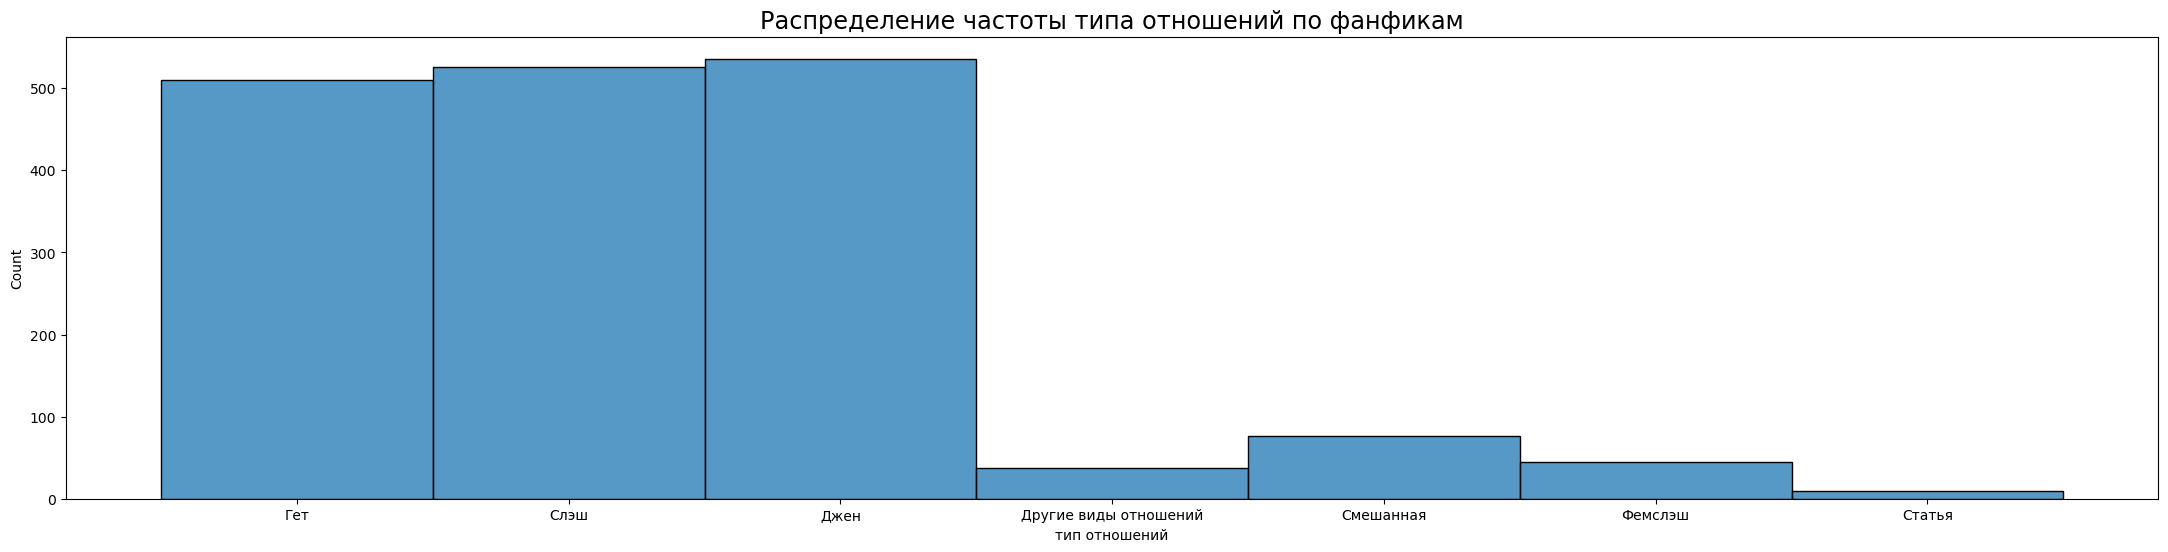

In [21]:
plt.rc('font', size=10) 
plt.figure(figsize = (27, 6))
df['тип отношений'].value_counts()
sns.histplot(df, x = 'тип отношений')
plt.title('Распределение частоты типа отношений по фанфикам', size='xx-large')
plt.show()

**Выводы**:одна из наших гипотез опровергается - самым популярным типом отношений является джен, а не слэш(хотя обгоняет он его ненамного). Также слэш во много раз популярнее фэмслэша, что понятно, учитывая преобладающую женскую аудиторию сайта.

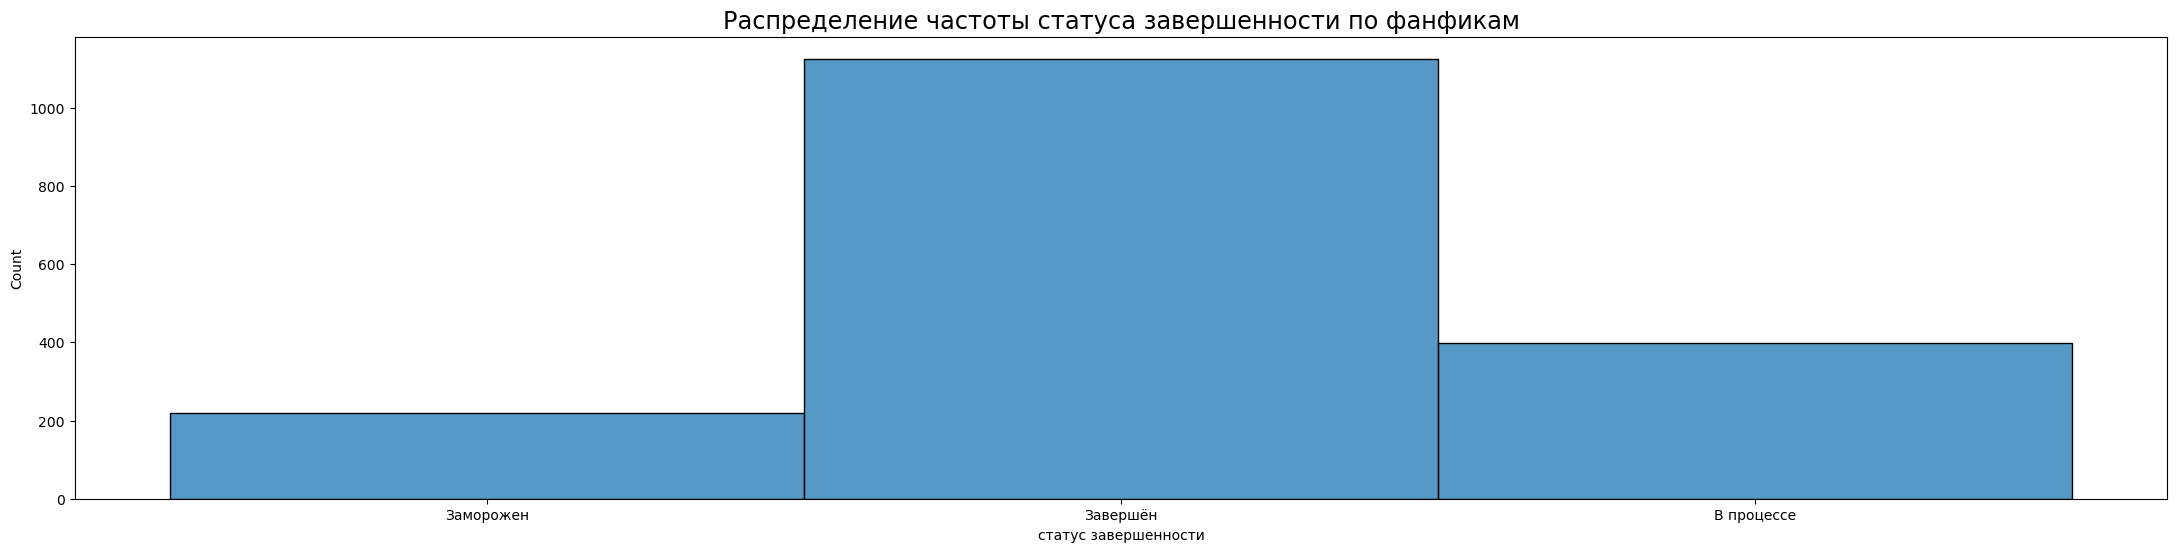

In [22]:
plt.figure(figsize = (27, 6))
df['статус завершенности'].value_counts()
sns.histplot(df, x = 'статус завершенности')
plt.title('Распределение частоты статуса завершенности по фанфикам', size='xx-large')
plt.show()

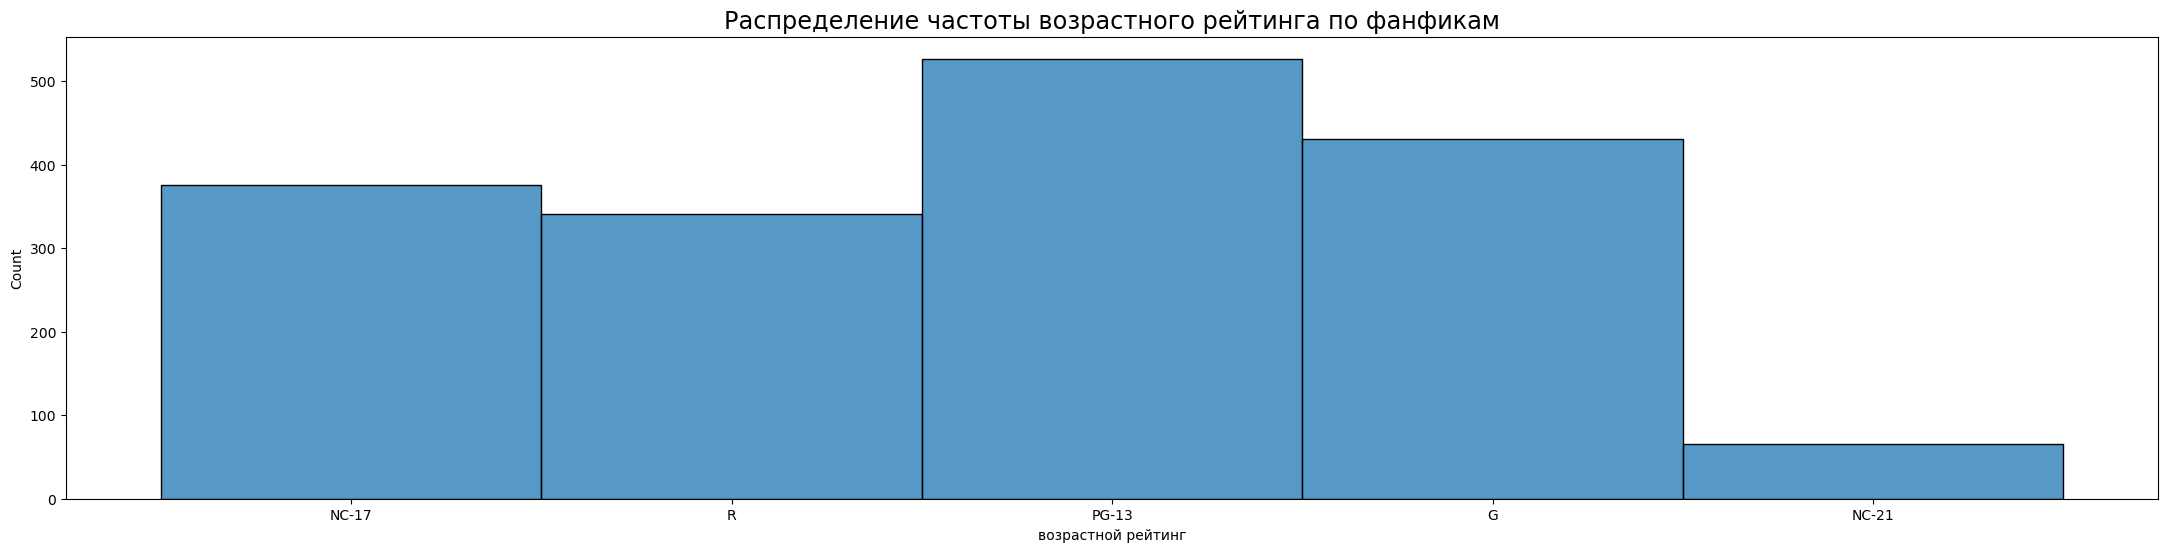

In [23]:
plt.figure(figsize = (27, 6))
df['возрастной рейтинг'].value_counts()
sns.histplot(df, x = 'возрастной рейтинг')
plt.title('Распределение частоты возрастного рейтинга по фанфикам', size='xx-large')
plt.show()

**Выводы**:Еще одна гипотеза опровергается - самым популярным ретингом является PG-13, а не NC-17(причем он всего лишь третий по частоте). Сравнивая с показателями [10летней давности](https://ficbook.net/readfic/1172038) делаем вывод - предпочтения аудитории не изменились, хотя PG-13 обогнал рейтинг G. Возможно дело в том, что аудитория сайта довольно молода и только знакомится с взрослым миром. Напомним, PG-13 - детям до 13 лет просмотр не желателен, допускает умеренное насилие и единичное употребление грубых ругательств, G - для любой аудитории, обнажение и сексуальные сцены отсутствуют. 

## Далее рассмотрим корреляцию между показателями

In [24]:
df.corr()

количество лайков  количество меток  \
количество лайков                        1.000000          0.042901   
количество меток                         0.042901          1.000000   
количество отзывов                       0.268545          0.236845   
количество страниц по фандому            0.128413         -0.022894   
Количество символов в описании           0.052473          0.259869   

                                количество отзывов  \
количество лайков                         0.268545   
количество меток                          0.236845   
количество отзывов                        1.000000   
количество страниц по фандому             0.013729   
Количество символов в описании            0.159800   

                                количество страниц по фандому  \
количество лайков                                    0.128413   
количество меток                                    -0.022894   
количество отзывов                                   0.013729   
количество страниц по фандому                        1.000000   
Количество символов в описании                       0.074669   

                                Количество символов в описании  
количество лайков                                     0.052473  
количество меток                                      0.259869  
количество отзывов                                    0.159800  
количество страниц по фандому                         0.074669  
Количество символов в описании                        1.000000

Наибольшую корреляцию с нашей целевой переменной имеет количество лайков. Чем популярнее фанфик, тем больше читателям хочется его обсудить - и наоборот.

Text(0.5, 1.0, 'Correlation heatmap')

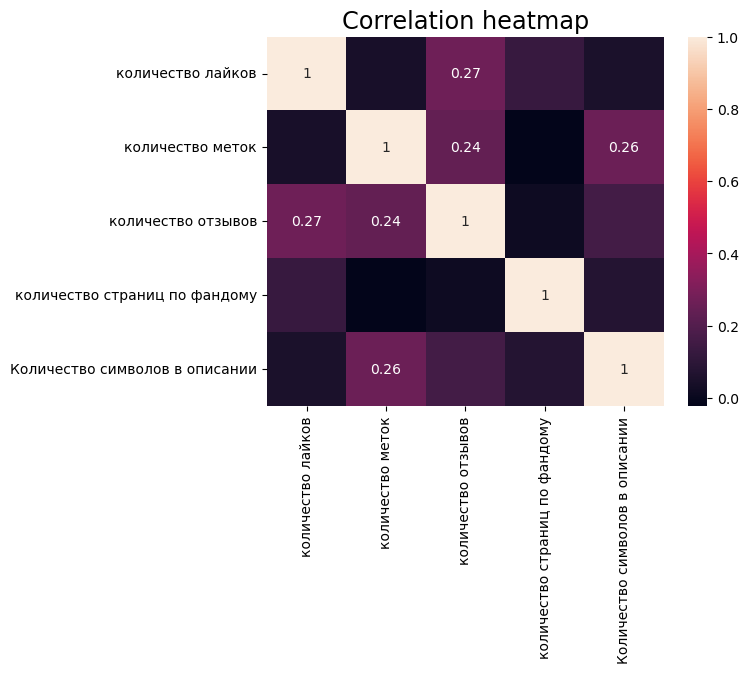

In [25]:
kek=sns.heatmap(df.corr(), annot = True) 
for j in kek.texts:
    if abs(float(j.get_text()))>=0.2:
        j.set_text(j.get_text())
    else:
        j.set_text('')
plt.title('Correlation heatmap', size='xx-large')

Text(0.5, 1, 'Pairplot')

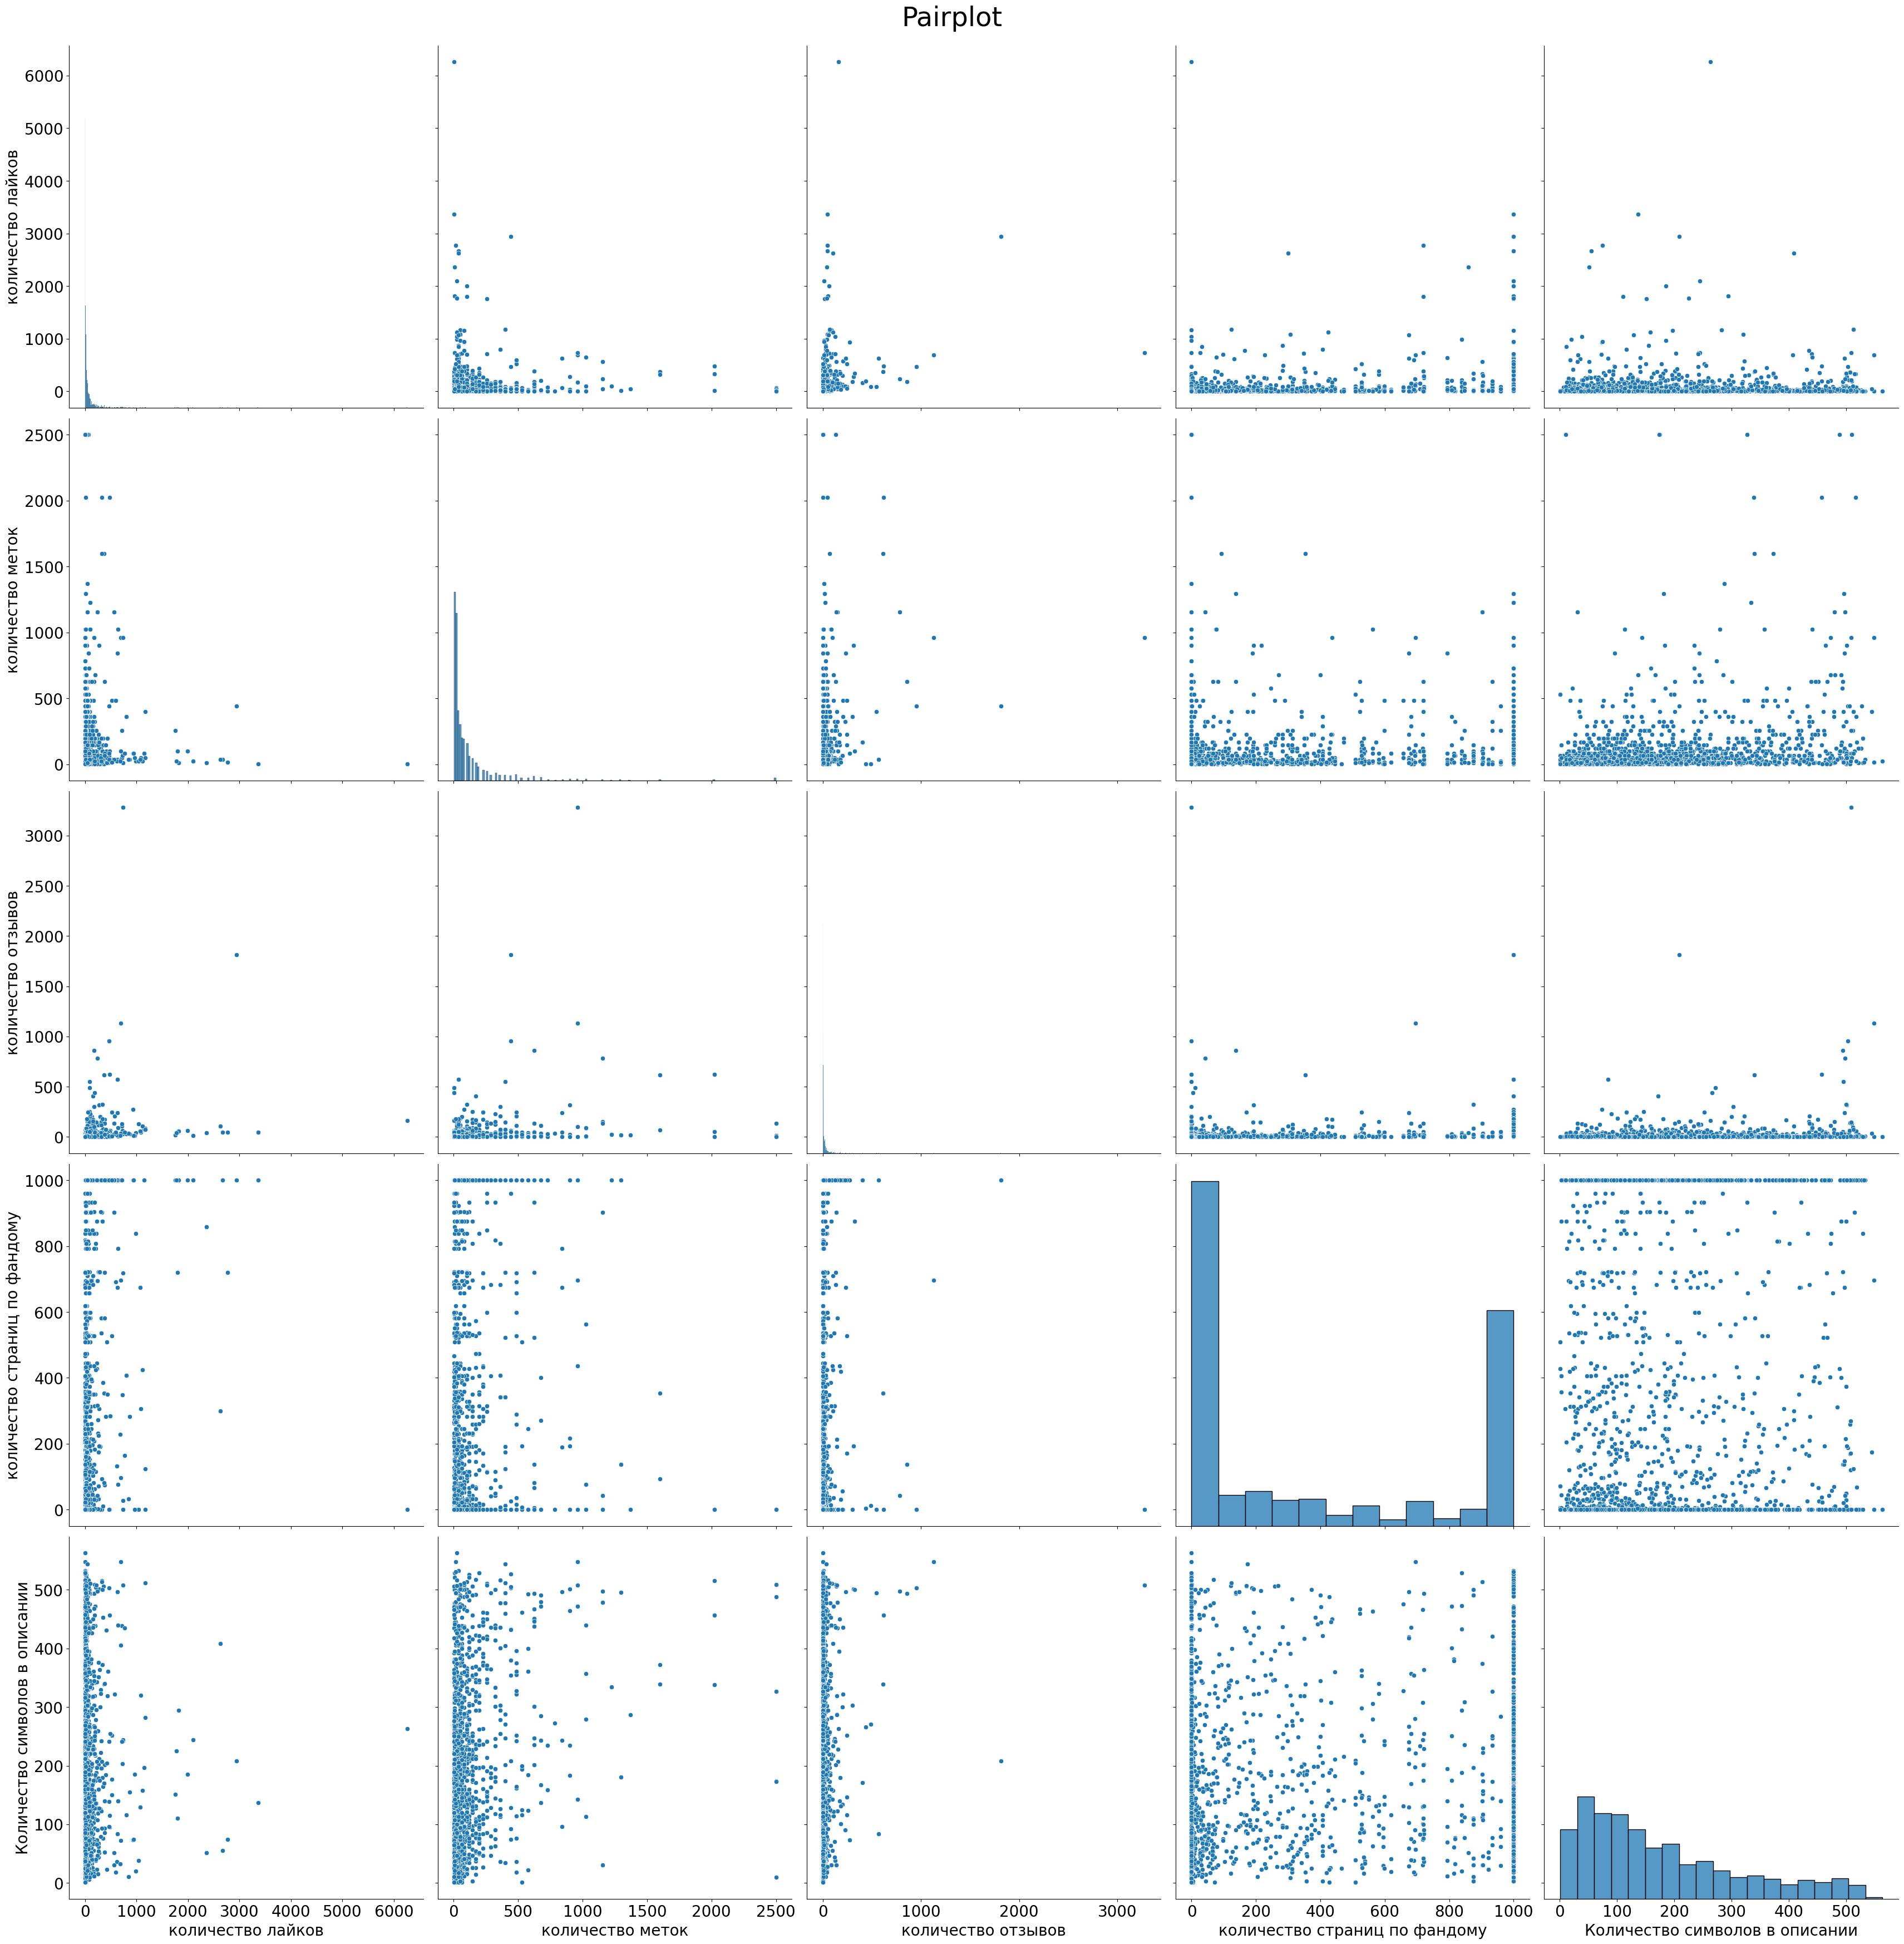

In [26]:
plt.rcParams.update({'font.size': 20})
sns.pairplot(data = df, height = 7)
plt.suptitle('Pairplot', y = 1, ha = 'center', va = 'center', size = 'xx-large')

<Axes: xlabel='количество меток'>

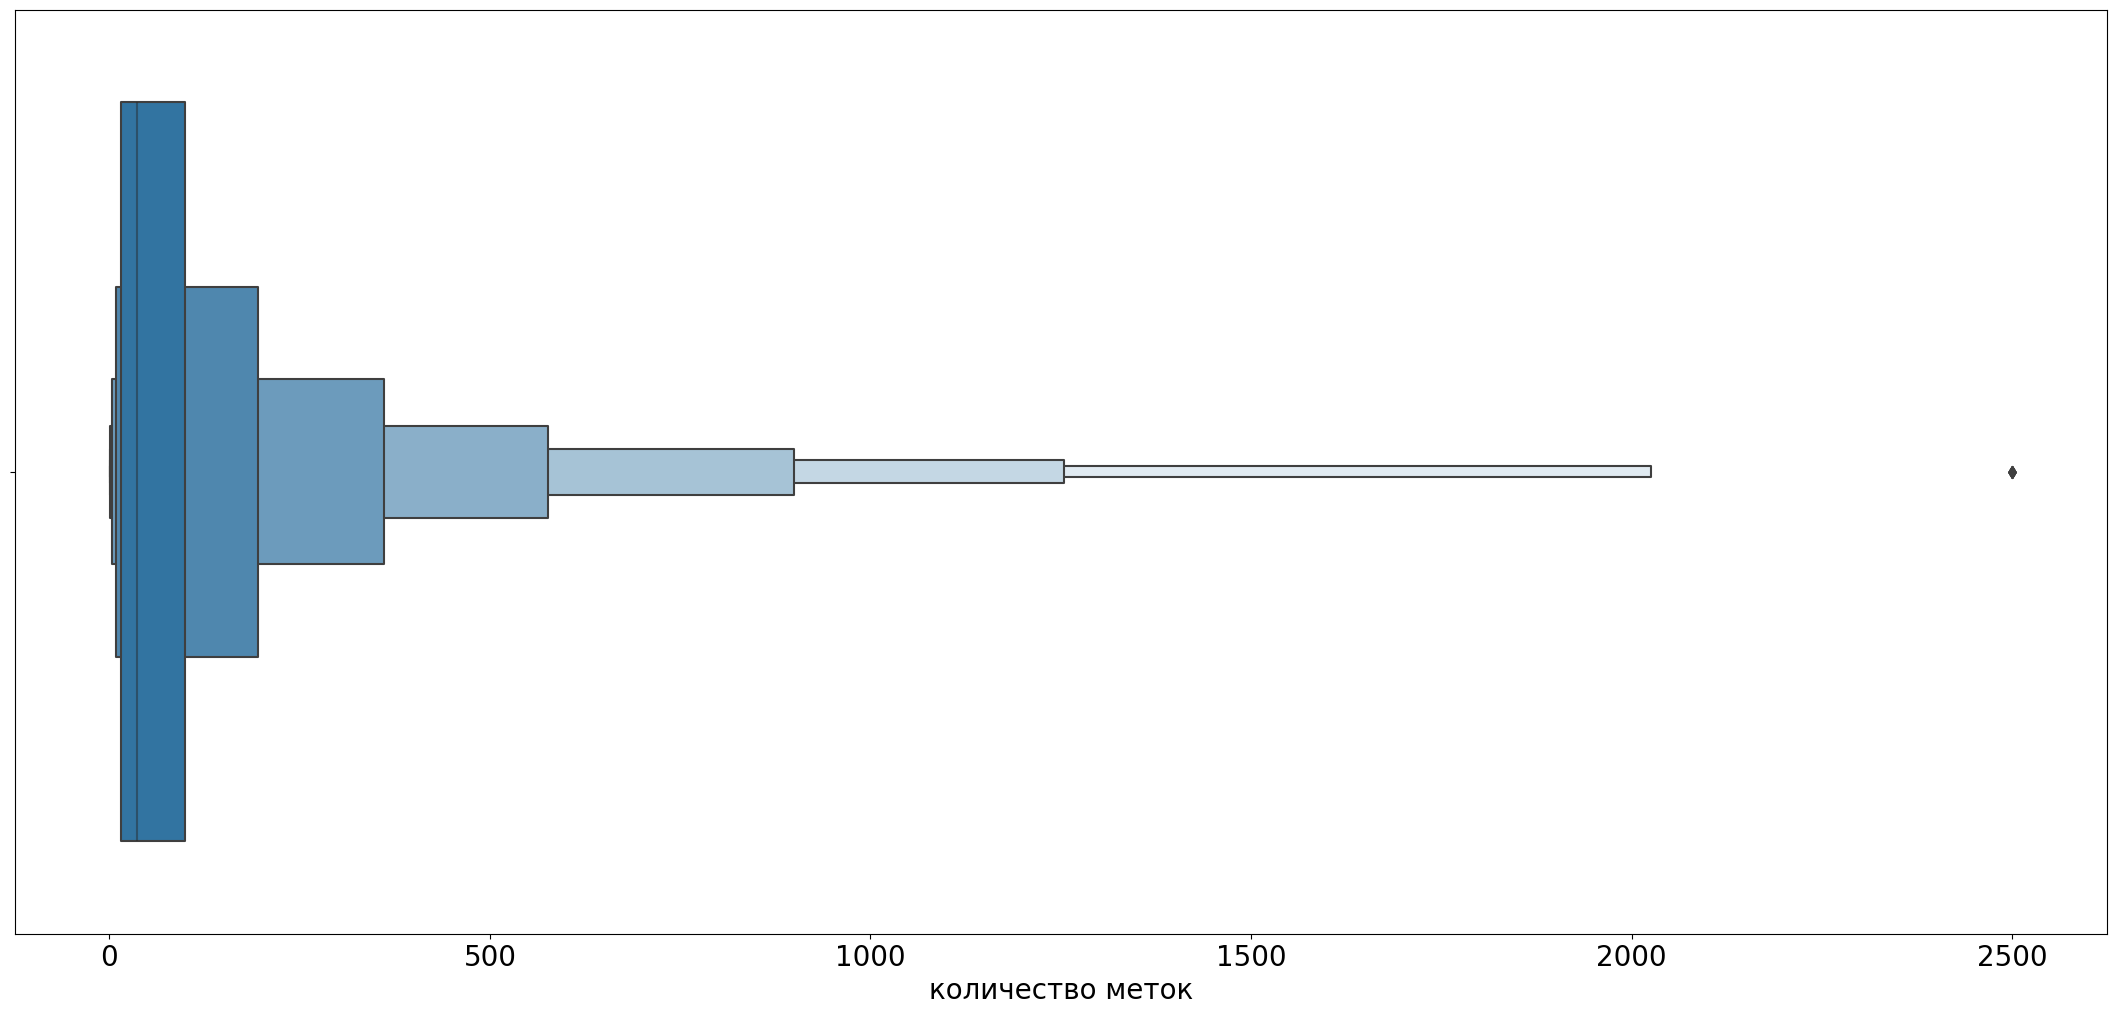

In [43]:
plt.figure(figsize = (27, 12))
sns.boxenplot(x = 'количество меток', data = df)

### Ящики с усами
Рассмотрим ящики с усами и посмотрим насколько много выбросов в наших данных

Text(0.5, 0, 'Количество лайков')

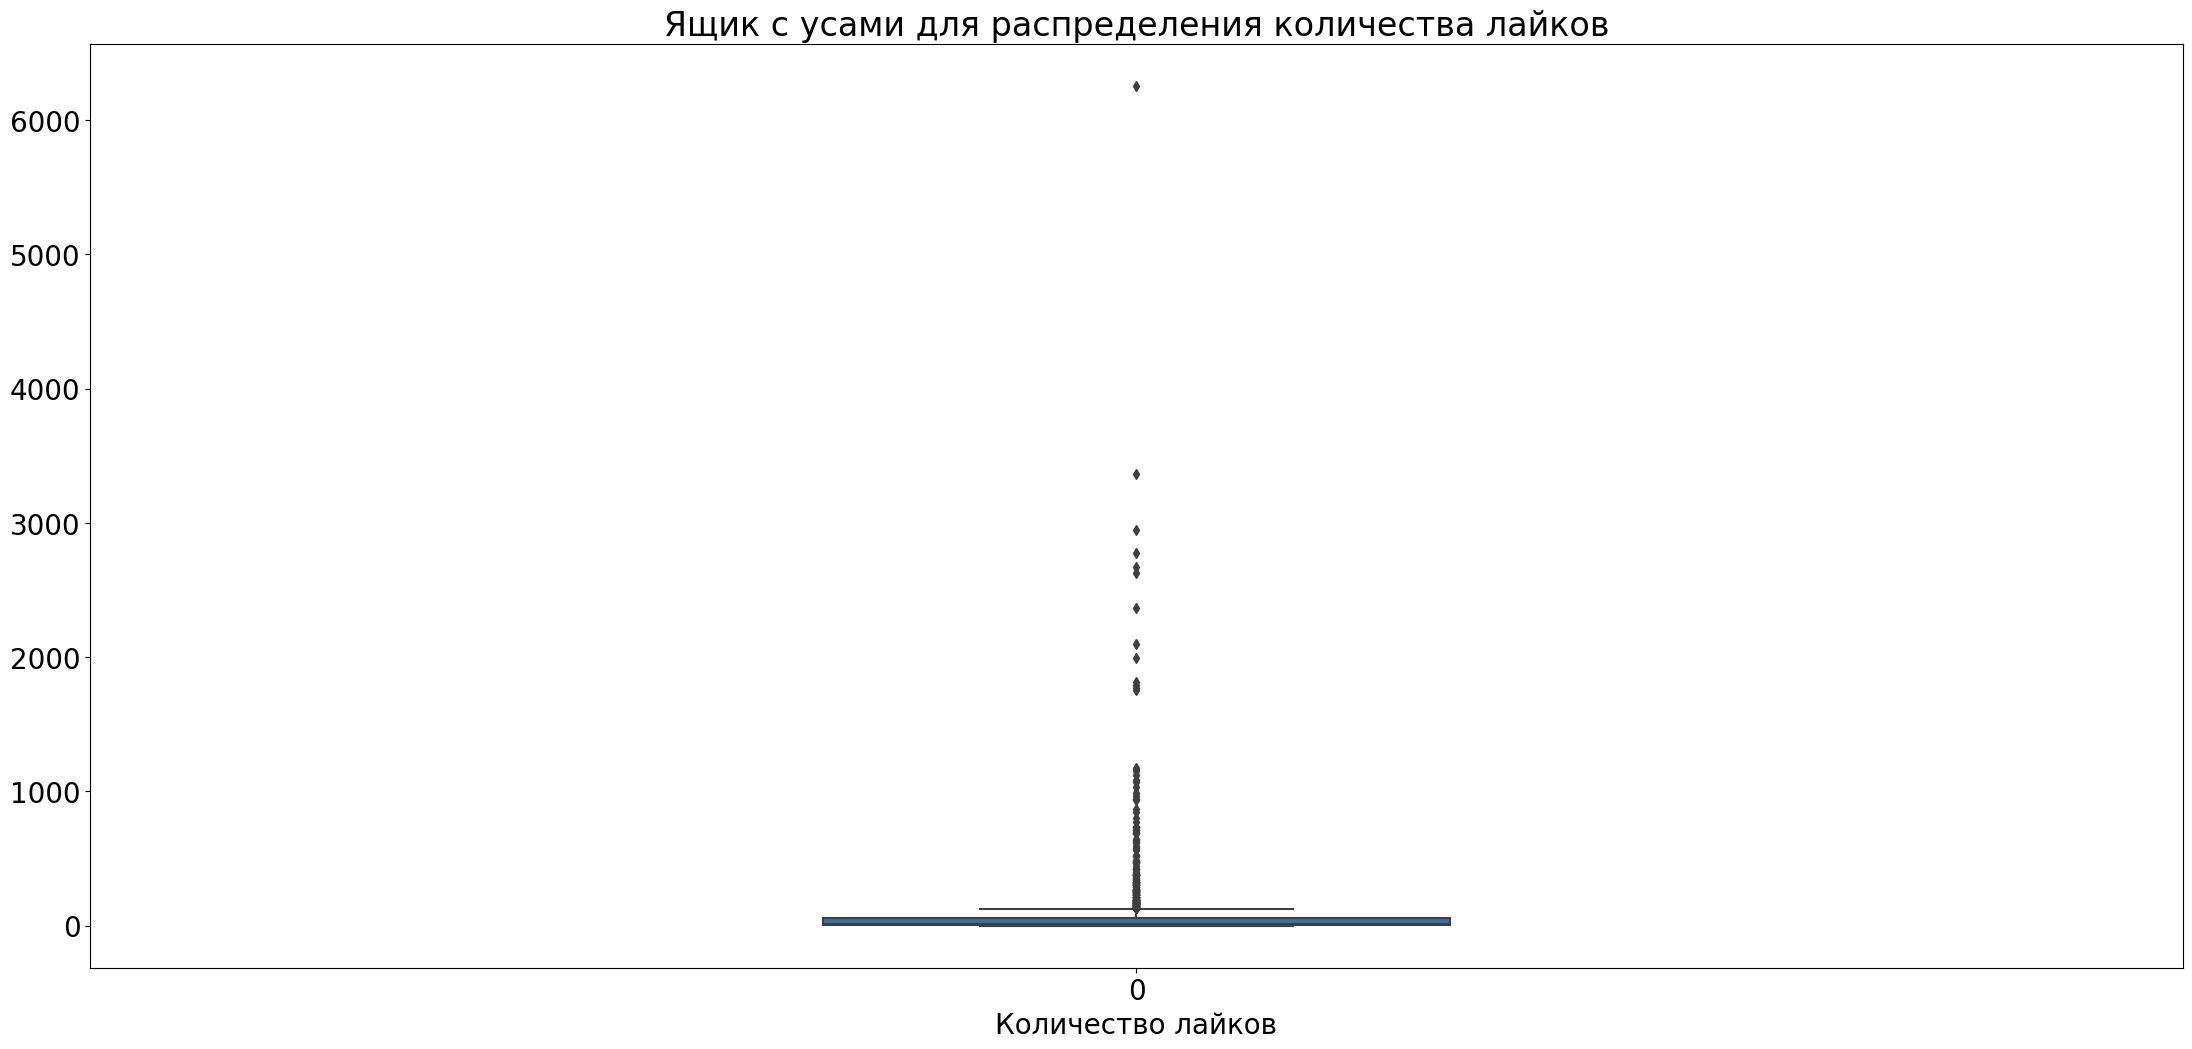

In [28]:
plt.figure(figsize = (27, 12))
sns.boxplot(data=df['количество лайков'], width=0.3)
plt.title('Ящик с усами для распределения количества лайков', size='large')
plt.xlabel('Количество лайков')

### Вывод:
Исходя из графика, можно сделать вывод, что у нас в основном выборка состоит из очень непопулярных фанфиков и соответственно очень много выбросов (причем выбросами будут считаться фанфики с количеством лайков от 250)

Text(0.5, 0, 'Количество отзывов')

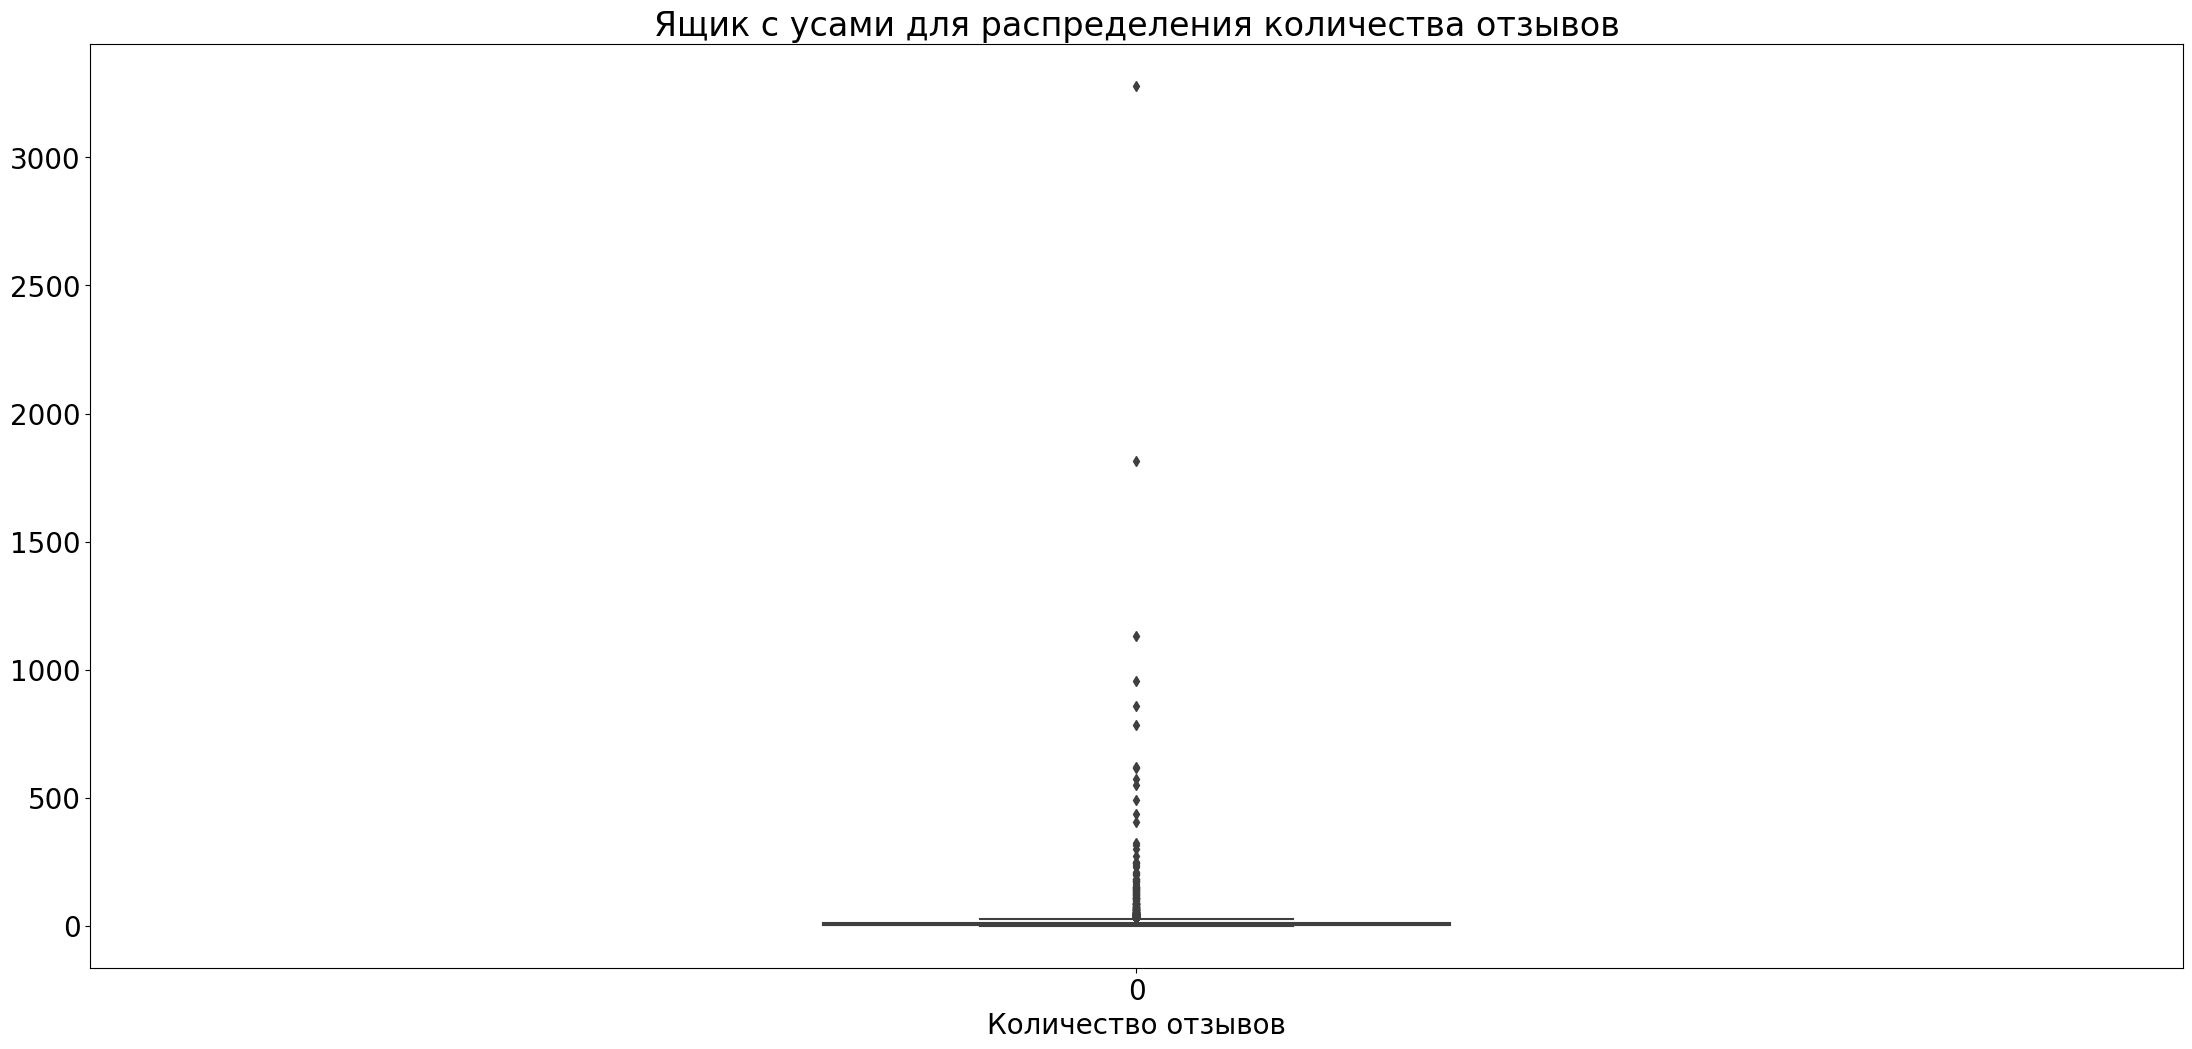

In [29]:
plt.figure(figsize = (27, 12))
sns.boxplot(data=df['количество отзывов'], width=0.3)
plt.title('Ящик с усами для распределения количества отзывов', size='large')
plt.xlabel('Количество отзывов')

### Вывод:
Опять же в выборке в основном не популярные фанфики, поэтому у нас множество выбросов с большим количеством отзывов

Text(0.5, 1.0, 'Ящик с усами для распределения количества меток, страниц по фандому и символов в описании')

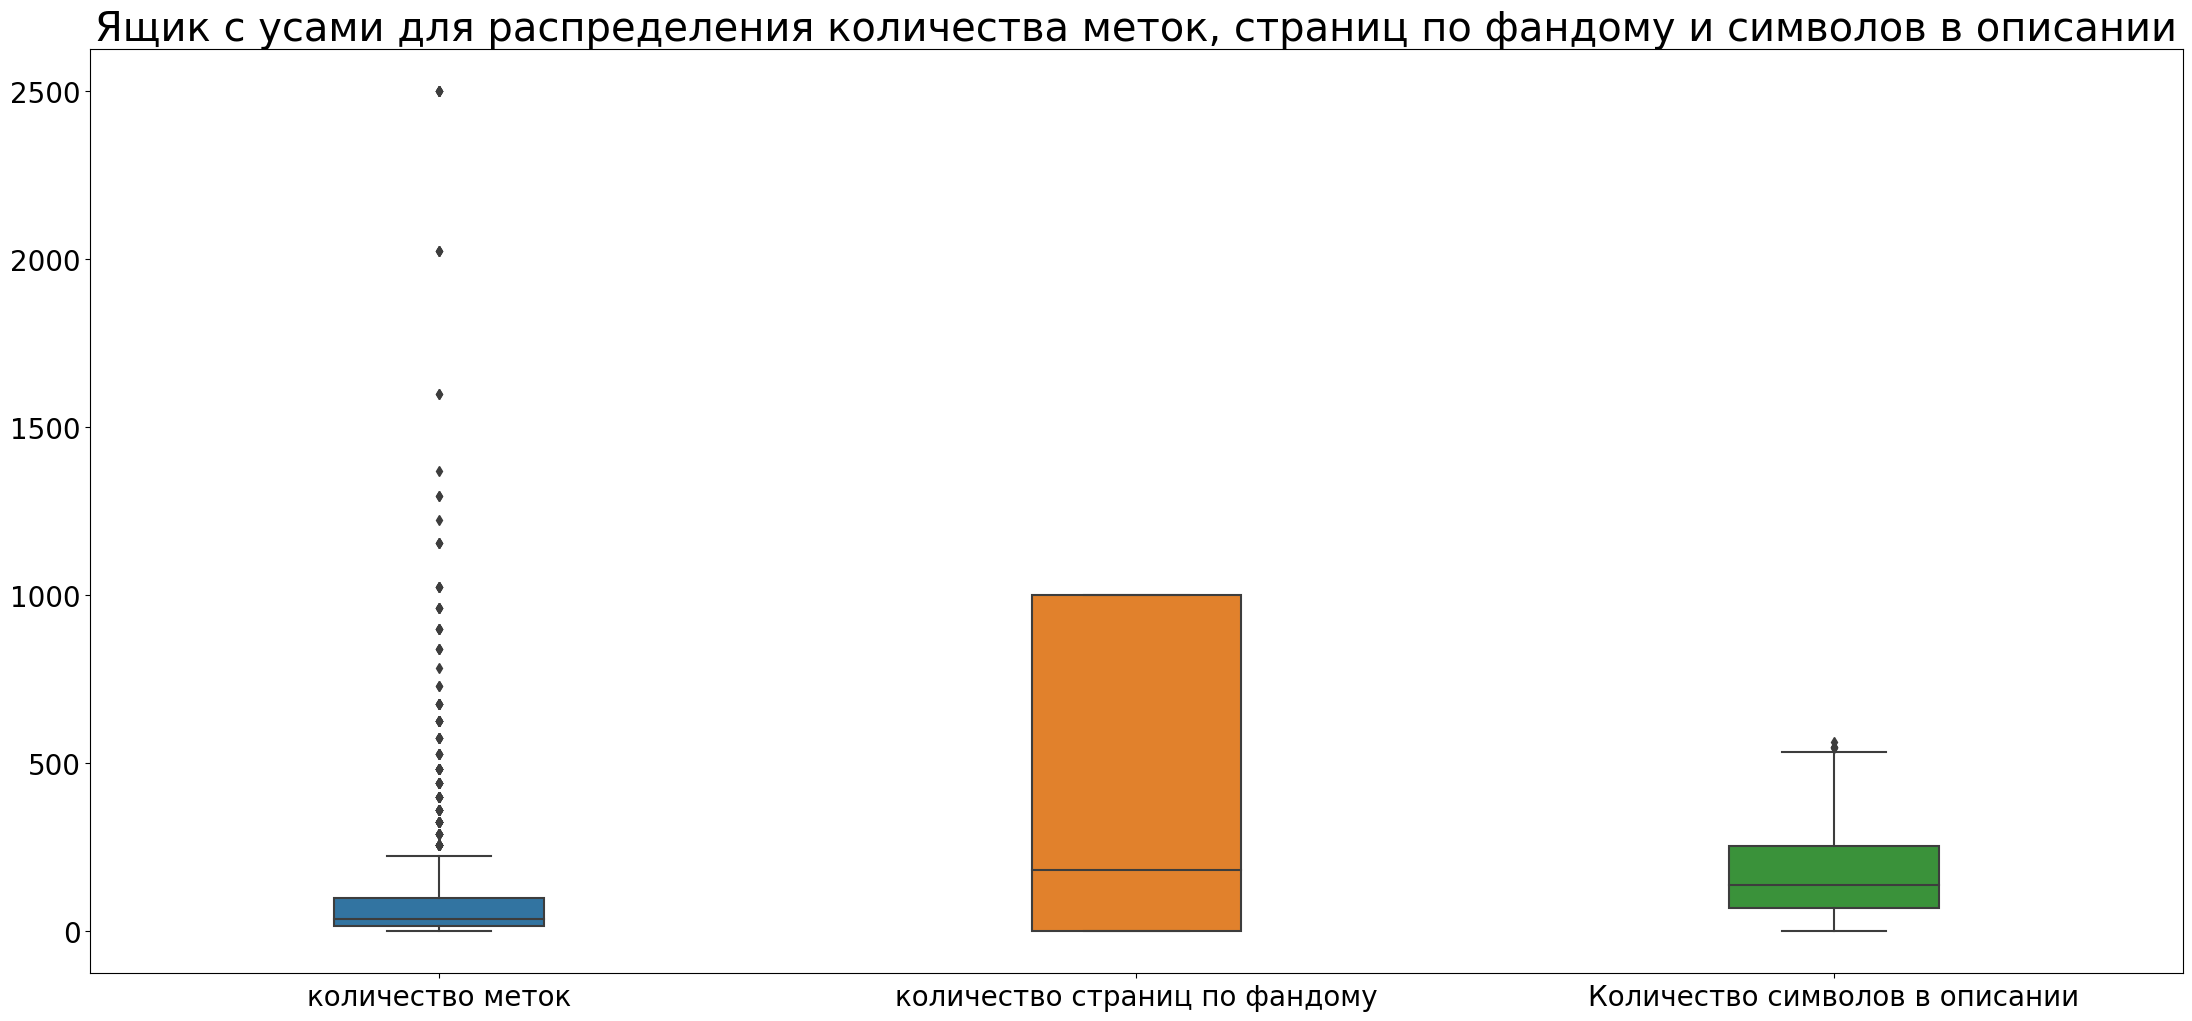

In [30]:
plt.figure(figsize = (27, 12))
df_itog = df
df_1 = df
sns.boxplot(data = df[['количество меток','количество страниц по фандому','Количество символов в описании']], width = 0.3)
plt.title('Ящик с усами для распределения количества меток, страниц по фандому и символов в описании', size='x-large')

### Вывод:
Количество символов в описании распределено кучно, выбросов нет, в отличии от количества меток, где наблюдается интервал с выбросами, но в целом их не очень много.
Количество страниц по фандому же распределено довольно не равномерно, поэтому ящик с усами говорит нам об отсутствии выбросов

### Гистограммы 
Рассмотрим как распределены количественные показатели

Text(0.5, 0, 'Количество лайков')

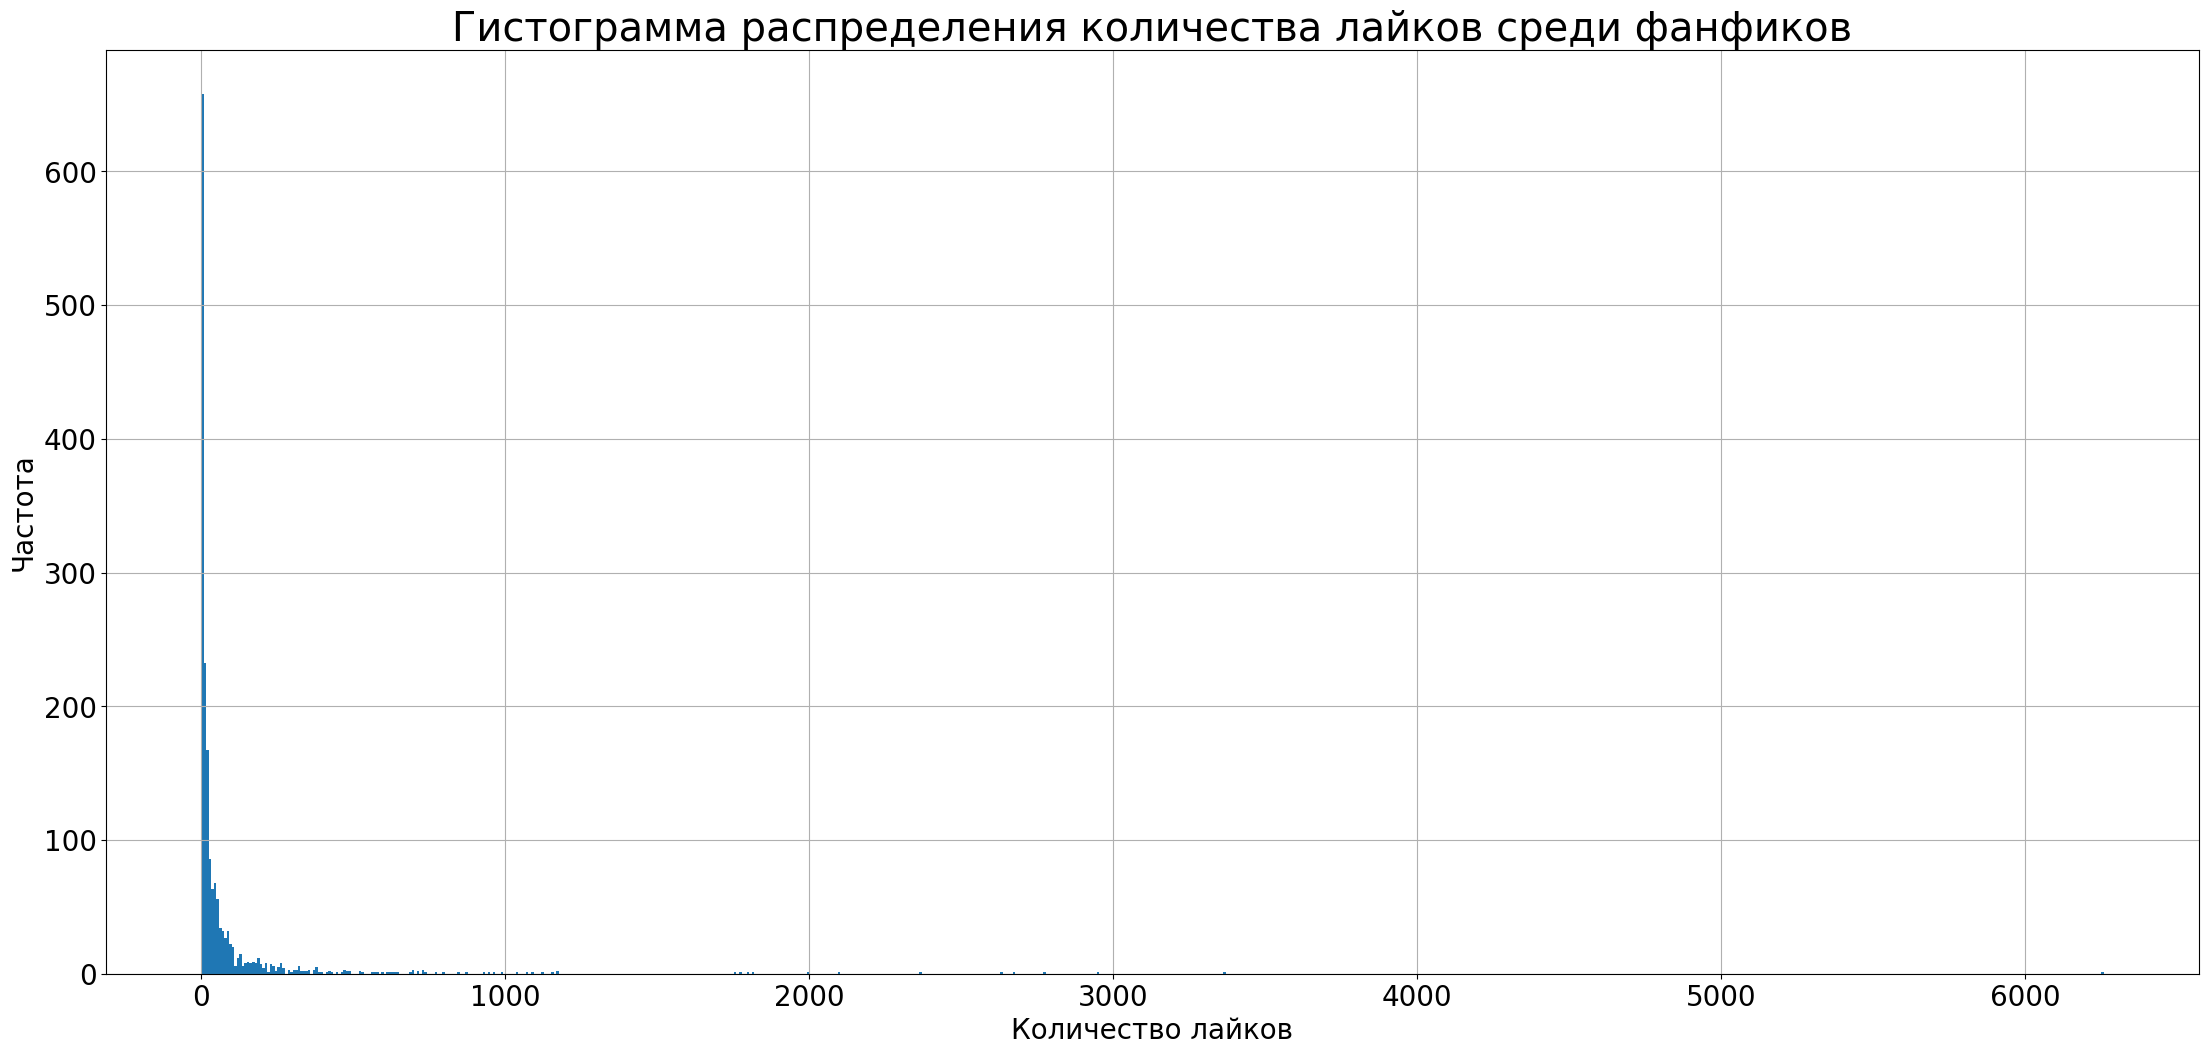

In [31]:
plt.figure(figsize = (27, 12))
df['количество лайков'].hist(bins = 750)
plt.title('Гистограмма распределения количества лайков среди фанфиков', size='x-large')
plt.ylabel('Частота')
plt.xlabel('Количество лайков')

Как уже было сказано ранее, выборка состоит преимущественно из непопулярных фанфиков.

Text(0.5, 0, 'Количество меток')

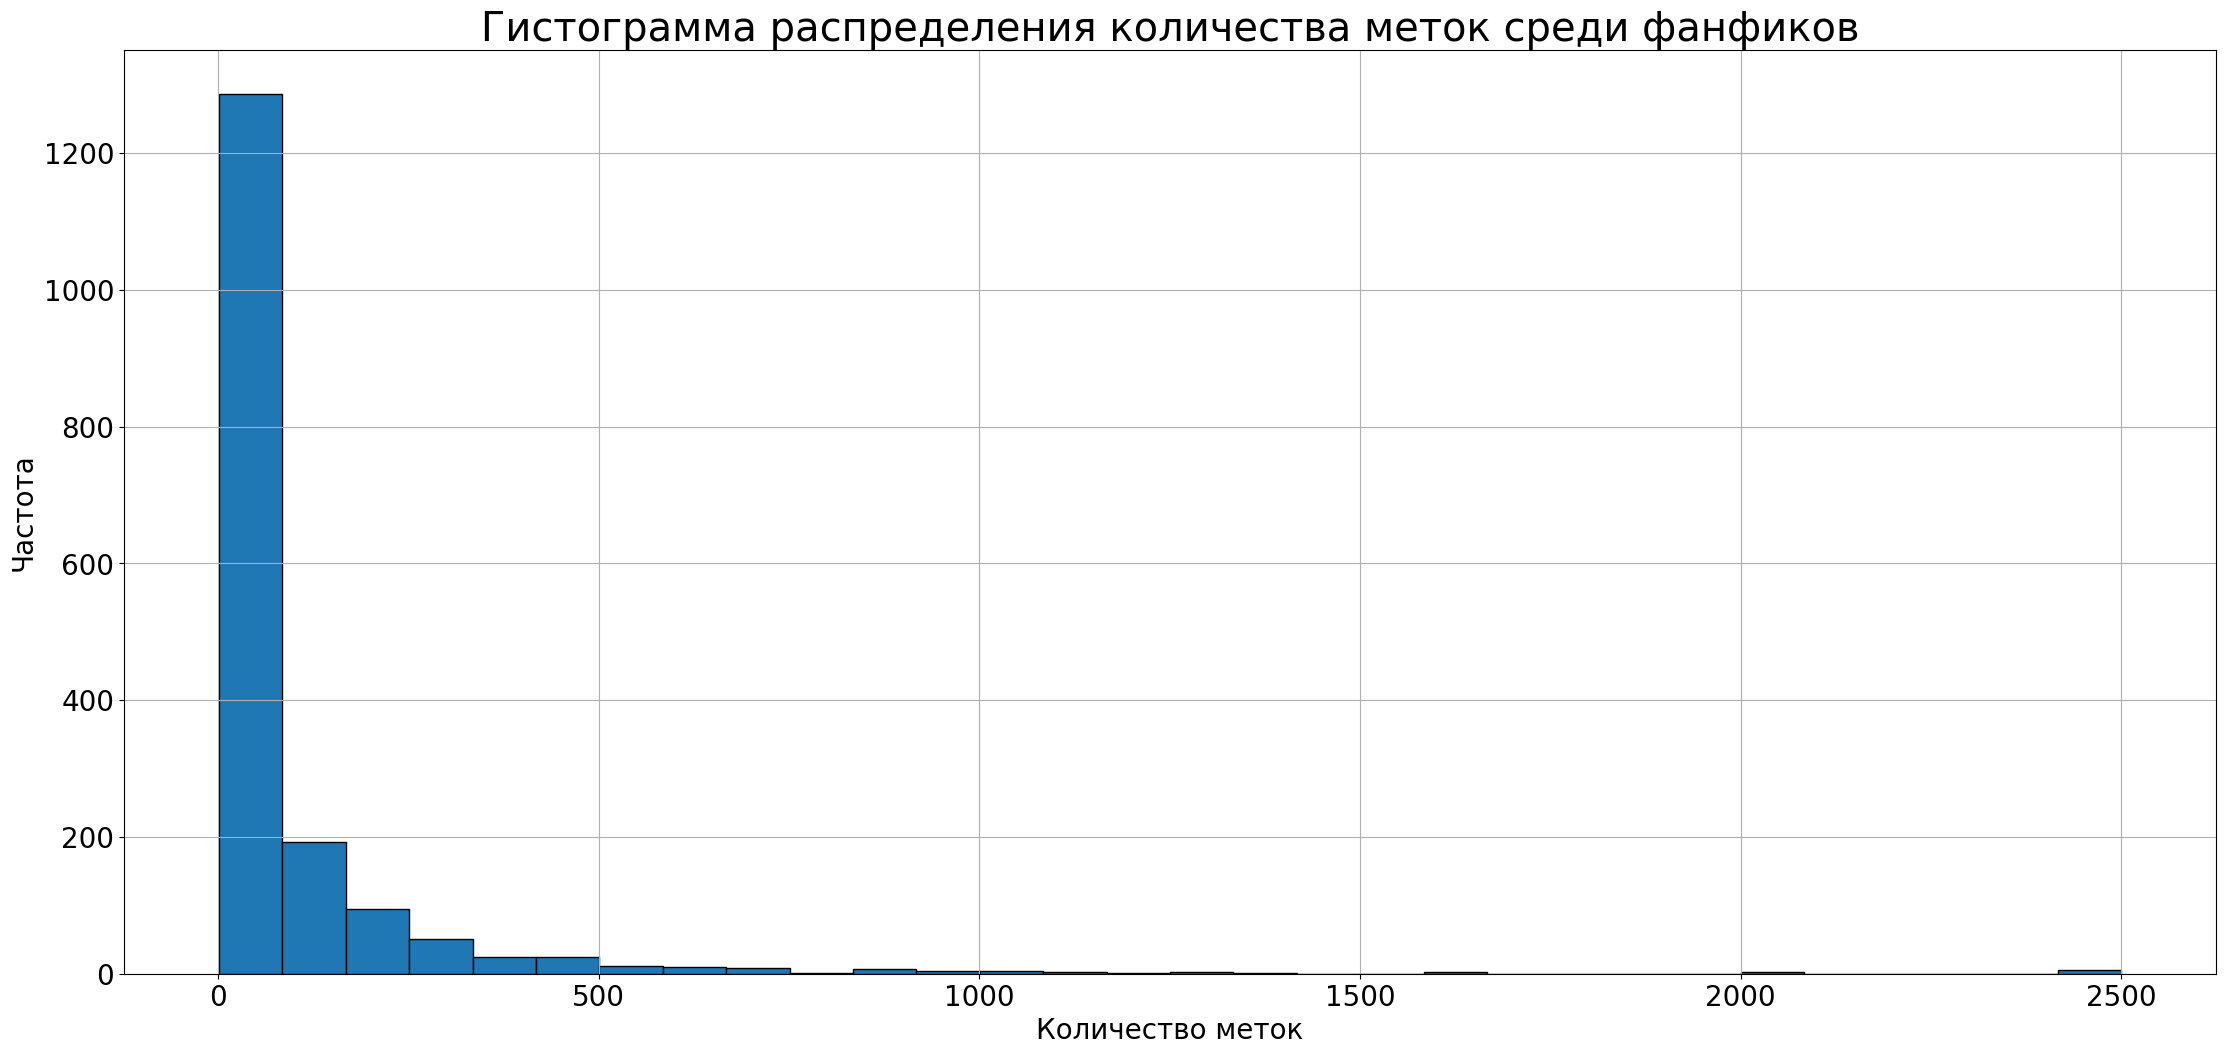

In [32]:
plt.figure(figsize = (27, 12))
df['количество меток'].hist(bins = 30, edgecolor = 'black')
plt.title('Гистограмма распределения количества меток среди фанфиков', size='x-large')
plt.ylabel('Частота')
plt.xlabel('Количество меток')

Text(0.5, 0, 'Количество страниц среди фандомов')

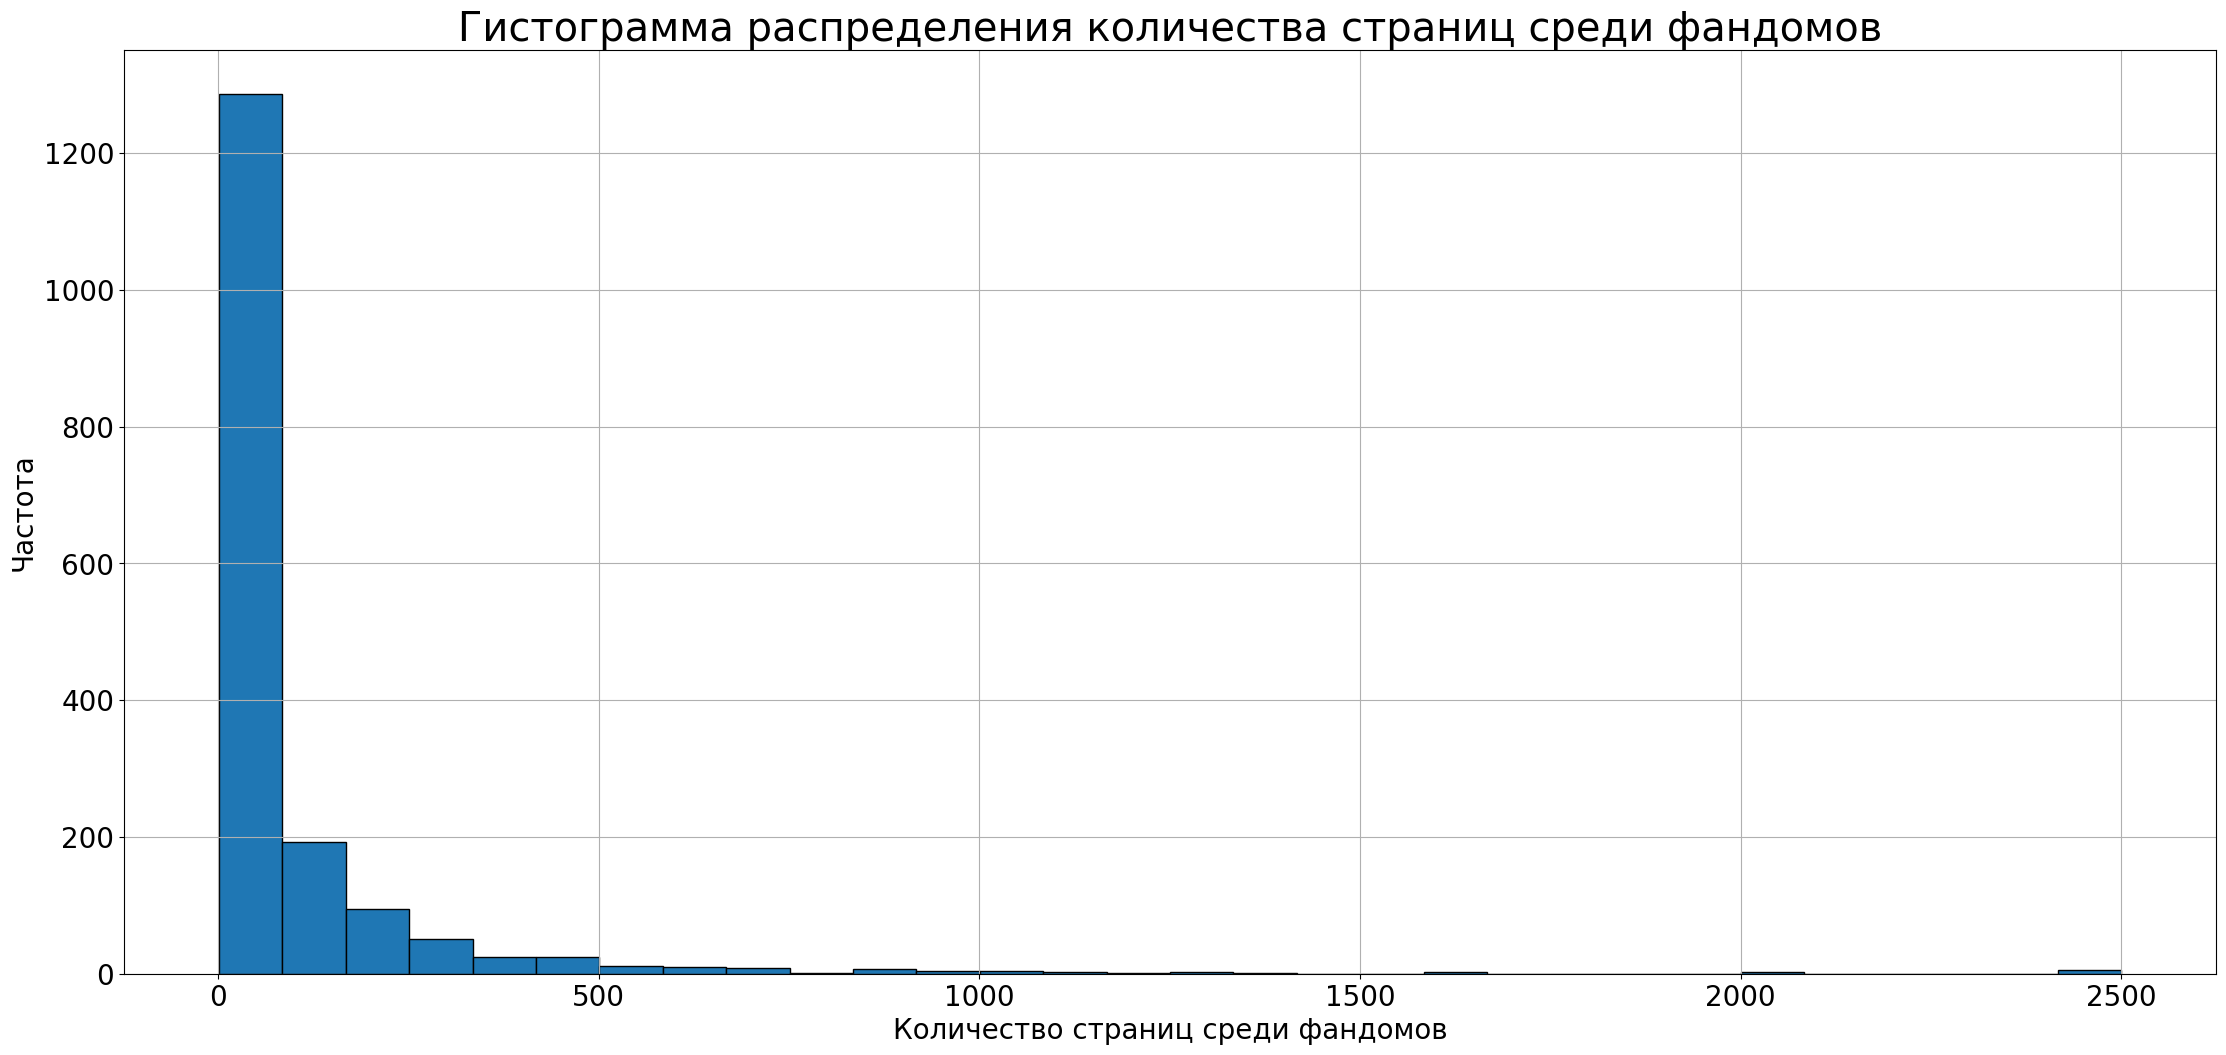

In [33]:
plt.figure(figsize = (27, 12))
df['количество меток'].hist(bins = 30, edgecolor = 'black')
plt.title('Гистограмма распределения количества страниц среди фандомов', size='x-large')
plt.ylabel('Частота')
plt.xlabel('Количество страниц среди фандомов')

0 страниц имеют ориджиналы - работы без фэндома. Видимо они продолжают сохранять доминирующие позиции среди работ на фикбуке.

Text(0.5, 0, 'Количество символов в описании')

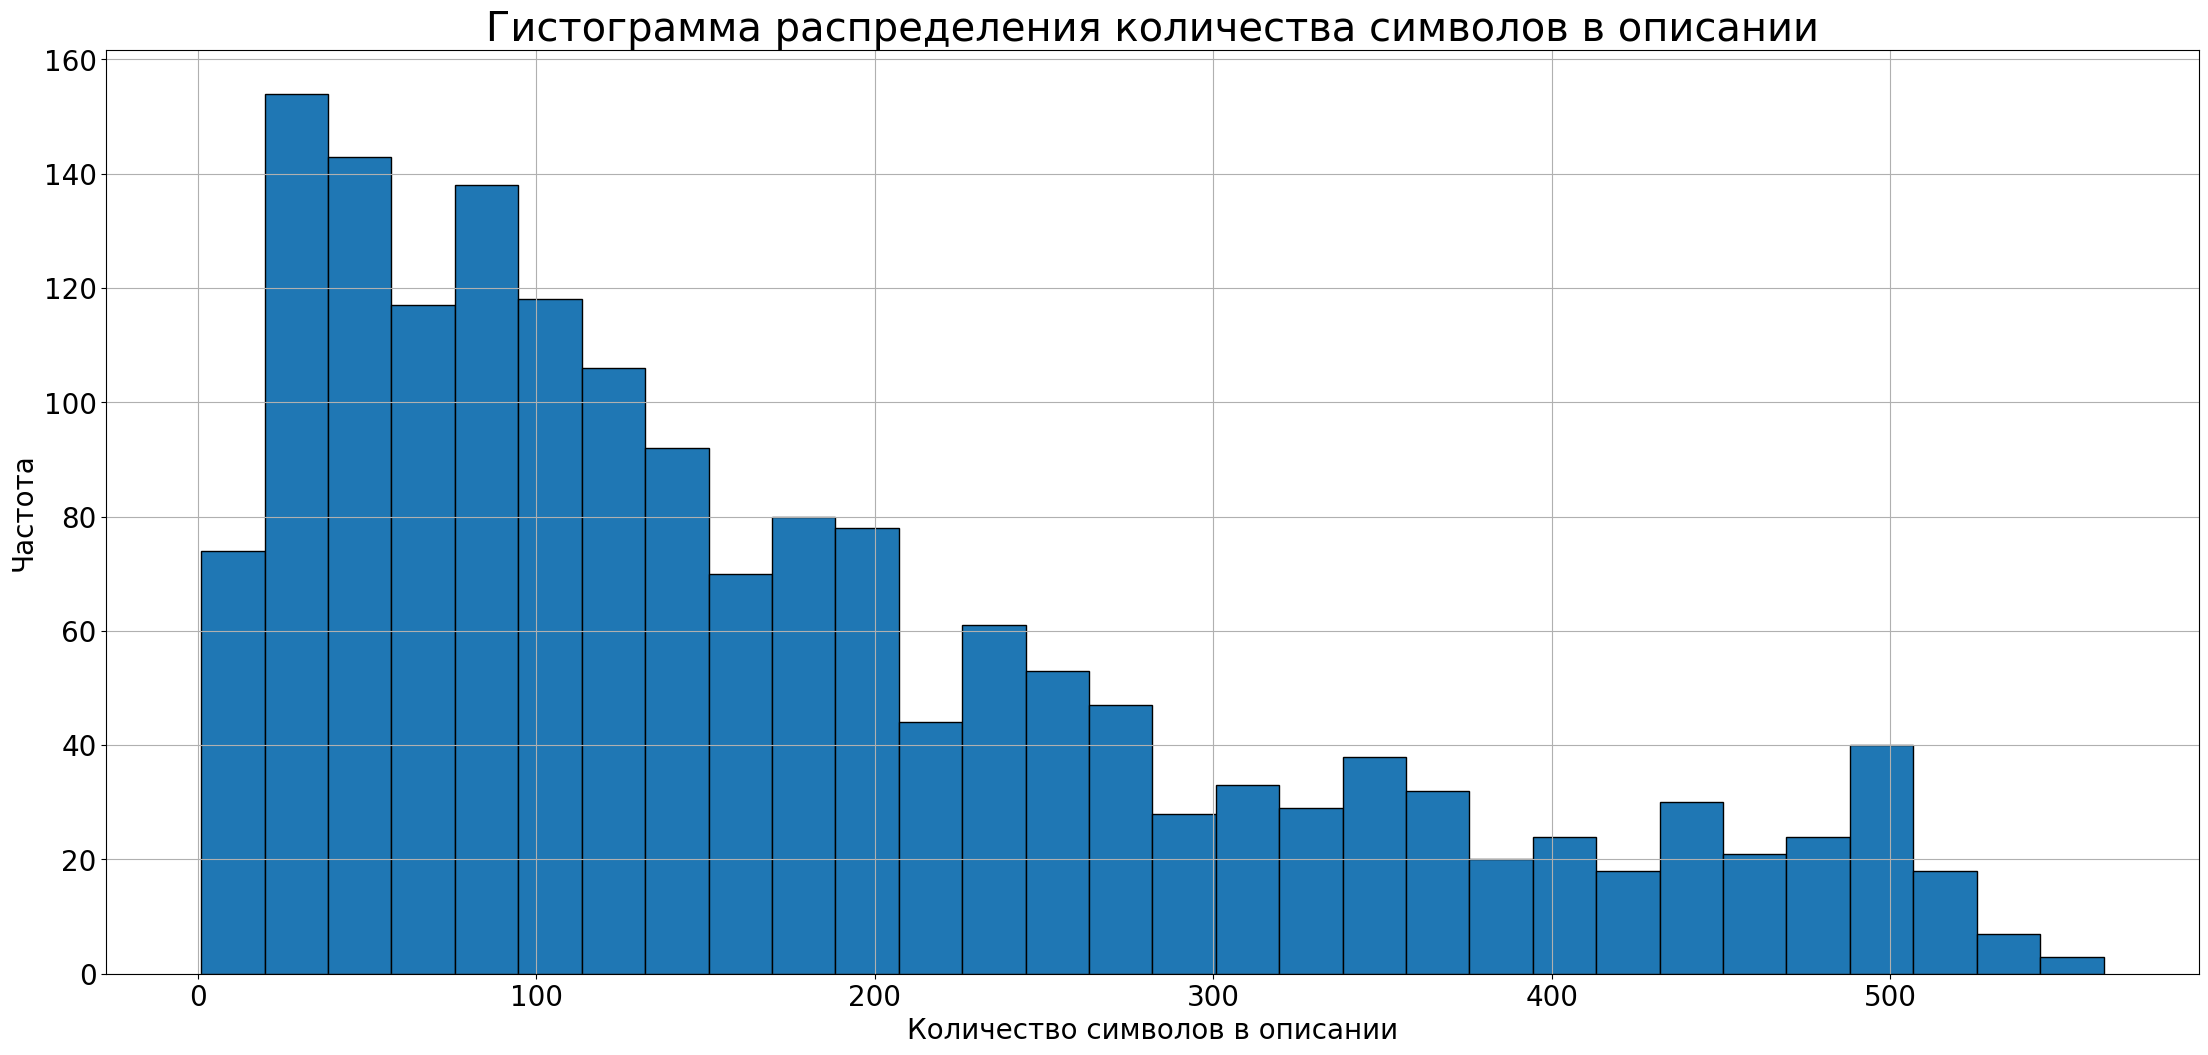

In [35]:
plt.figure(figsize = (27, 12))
df['Количество символов в описании'].hist(bins = 30, edgecolor = 'black')
plt.title('Гистограмма распределения количества символов в описании', size='x-large')
plt.ylabel('Частота')
plt.xlabel('Количество символов в описании')

Чаще всего в описании от 20 до 100 символов(это 1-2 предложения), причем чем меньше тем лучше. Видимо авторы на фикбуке считают, что краткость - сестра таланта. 

### Построим облака рассеивания по типам отношений

In [36]:
name_1 = 'Облако рассеивания с распределением по типу отношений'
axz=px.scatter_3d(df, x = 'количество меток', y = 'количество лайков', 
                  z = 'Количество символов в описании', color = 'тип отношений', title = name_1)
axz.show()

In [37]:
axz=px.scatter_3d(df, x = 'количество страниц по фандому', y = 'количество лайков', 
                  z = 'количество отзывов', color = 'тип отношений', title = name_1)
axz.show()

### Построим такие же графики для Возрастного рейтинга

In [38]:
name_2 = 'Облако рассеивания с распределением по возрастному рейтингу'
axz=px.scatter_3d(df, x = 'количество меток', y = 'количество лайков', 
                  z = 'Количество символов в описании', color = 'возрастной рейтинг', title = name_2)
axz.show()

In [39]:
axz=px.scatter_3d(df, x = 'количество страниц по фандому', y = 'количество лайков', 
                  z = 'количество отзывов', color = 'возрастной рейтинг', title = name_2)
axz.show()

### Графики для статуса завершенности

In [40]:
name_3 = 'Облако рассеивания с распределением по статусу завершенности'
axz=px.scatter_3d(df, x = 'количество меток', y = 'количество лайков', 
                  z = 'Количество символов в описании', color = 'статус завершенности', title = name_3)
axz.show()

In [41]:
axz=px.scatter_3d(df, x = 'количество страниц по фандому', y = 'количество лайков', 
                  z = 'количество отзывов', color = 'статус завершенности', 
                  title = str(name_3))
axz.show()